[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM-examples.git/main?urlpath=PySDM_examples/Morrison_and_Grabowski_2007/fig_3.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/Morrison_and_Grabowski_2007/fig_3.ipynb)

#### based on Fig. 3 from Morrison & Grabowski 2007 (J. Atmos. Sci. 64)  "_Comparison of Bulk and Bin Warm-Rain Microphysics Models Using a Kinematic Framework_"
https://doi.org/10.1175/JAS3980

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from PySDM_examples.Morrison_and_Grabowski_2007 import Cumulus
from PySDM_examples.Szumowski_et_al_1998.fields import nondivergent_vector_field_2d, z_vec_coord, x_vec_coord
from PySDM.physics import si
from PySDM import Formulae
from matplotlib import pylab
from open_atmos_jupyter_utils import show_plot

In [3]:
settings = Cumulus(Formulae())
rho_times_courant = nondivergent_vector_field_2d(
    settings.grid, settings.size, settings.dt, settings.stream_function,
    t=25*si.min
)
dz = settings.size[-1] / settings.grid[-1]
dx = settings.size[0] / settings.grid[0]

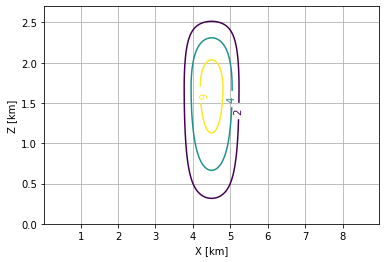

HTML(value="<a href='./tmpcqmjr1_z.pdf' target='_blank'>./tmpcqmjr1_z.pdf</a><br>")

In [6]:
z_vec_coords = tuple(coord * settings.size[i]/si.km for i, coord in enumerate(z_vec_coord(settings.grid)))
pylab.clabel(pylab.contour(
    *z_vec_coords,
    rho_times_courant[-1] * dz / settings.dt / settings.rhod_of_zZ(z_vec_coords[-1]/settings.size[-1]),
    levels=(2 * si.m/si.s, 4 * si.m/si.s, 6 * si.m/si.s)
))
pylab.grid()
pylab.xlabel('X [km]')
pylab.ylabel('Z [km]')
show_plot()

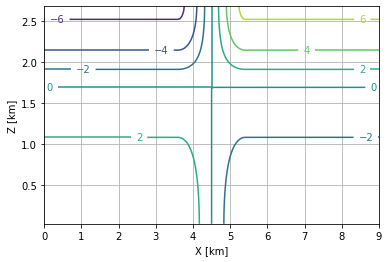

HTML(value="<a href='./tmp1jgtbmjt.pdf' target='_blank'>./tmp1jgtbmjt.pdf</a><br>")

In [7]:
x_vec_coords = tuple(coord * settings.size[i]/si.km for i, coord in enumerate(x_vec_coord(settings.grid)))
pylab.clabel(pylab.contour(
    *x_vec_coords,
    rho_times_courant[0] * dx / settings.dt / settings.rhod_of_zZ(x_vec_coords[0]/settings.size[0]),
))
pylab.grid()
pylab.xlabel('X [km]')
pylab.ylabel('Z [km]')
show_plot()